# **Renata Income Data Analysis**

---



---



**1. Importing Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.cluster import KMeans as kmns
from sklearn import preprocessing

2. Importing data

In [2]:
df = pd.read_csv('Renata Income Data.csv')
df.head()   # checking first 5 rows of the dataframe

,ID,Customer Name,Division,Gender,MaritalStatus,Age,Income
0,BU79786,Christine,Dhaka,F,Married,42,56274
1,QZ44356,Susan,Rajshahi,F,Single,32,0
2,AI49188,Margaret,Khulna,F,Married,48,48767
3,WW63253,David,Barishal,M,Married,32,0
4,HB64268,Peter,Mymensingh,M,Single,24,43836


3. Checking Datatypes

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             50 non-null     object
 1   Customer Name  50 non-null     object
 2   Division       50 non-null     object
 3   Gender         50 non-null     object
 4   MaritalStatus  50 non-null     object
 5   Age            50 non-null     int64 
 6   Income         50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


4. Counting unique values for each column

In [4]:
df.nunique()

ID               50
Customer Name    50
Division          8
Gender            2
MaritalStatus     3
Age              20
Income           37
dtype: int64

5. Dropping Column "ID"

In [5]:
df=df.drop(['ID'],axis=1)
df.head() # checking first 5 rows of the dataframe after dropping columns

,Customer Name,Division,Gender,MaritalStatus,Age,Income
0,Christine,Dhaka,F,Married,42,56274
1,Susan,Rajshahi,F,Single,32,0
2,Margaret,Khulna,F,Married,48,48767
3,David,Barishal,M,Married,32,0
4,Peter,Mymensingh,M,Single,24,43836


6. Label Encoding

In [6]:
le_clms=['Customer Name','Division','Gender','MaritalStatus'] ## columns for label encoding

le1 = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()
le3 = preprocessing.LabelEncoder()
le4 = preprocessing.LabelEncoder()


df['Customer Name']= le1.fit_transform(df['Customer Name'])
df['Division']= le2.fit_transform(df['Division'])
df['Gender']= le3.fit_transform(df['Gender'])
df['MaritalStatus']= le4.fit_transform(df['MaritalStatus'])



df.head()

,Customer Name,Division,Gender,MaritalStatus,Age,Income
0,7,2,0,1,42,56274
1,45,5,0,2,32,0
2,30,3,0,1,48,48767
3,10,0,1,1,32,0
4,37,4,1,2,24,43836


7. Check The Label Mappings

In [7]:
le2_name_mapping = dict(zip(le2.classes_, le2.transform(le2.classes_)))
print(le2_name_mapping)



le3_name_mapping = dict(zip(le3.classes_, le3.transform(le3.classes_)))
print(le3_name_mapping)




le4_name_mapping = dict(zip(le4.classes_, le4.transform(le4.classes_)))
print(le4_name_mapping)

{'Barishal': 0, 'Chattogram': 1, 'Dhaka': 2, 'Khulna': 3, 'Mymensingh': 4, 'Rajshahi': 5, 'Rangpur': 6, 'Sylhet': 7}
{'F': 0, 'M': 1}
{'Divorced': 0, 'Married': 1, 'Single': 2}


8. Performing K-means Clustering based on Division

Centers are [[6.5       ]
 [2.53846154]
 [4.5       ]
 [0.63636364]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='Division', ylabel='Division'>

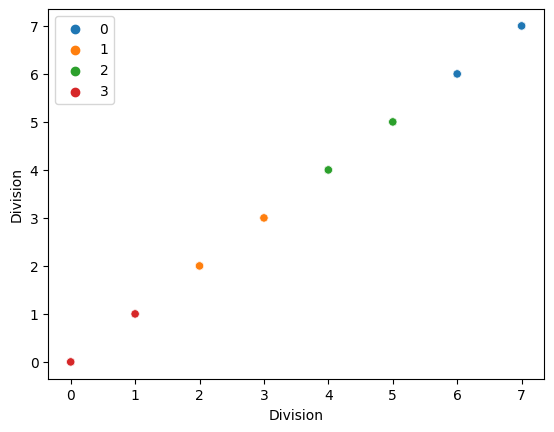

In [8]:
data = np.array(df['Division']).reshape(-1,1) ## making encoded "Division" column a numpy column vector
kmeans = kmns(n_clusters = 4, random_state = 123)
kmeans.fit(data)

print('Centers are {}'.format(kmeans.cluster_centers_))
sns.scatterplot(data = df, x = 'Division',  y='Division',hue = kmeans.labels_,palette="tab10")